In [6]:
# First import the packages we will use in this project

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [7]:
# read and take a look at the data
df = pd.read_csv(r"C:\Users\neslihan\OneDrive - Tishk International University\Desktop\Alex The Analytics\python\movies.csv")

df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country      budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000.0   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000.0   
2              Leigh Brackett       Mark Hamill   United States  18000000.0   
3                Jim Abrahams       Robert Hays   United States   3500000.0   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000.0   
...                       ...               ...             ...         ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000.0   
7664              Lisa Huston  Michael Saquella   United States         NaN   
7665             Lynno Lovert      Onyama Laura   United States     58750.0   
7666            James Randall     Christina Roz   United States     15000.0   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         NaN   

            gross                    company  runtime  
0      46998772.0               Warner Bros.    146.0  
1      58853106.0          Columbia Pictures    104.0  
2     538375067.0                  Lucasfilm    124.0  
3      83453539.0         Paramount Pictures     88.0  
4      39846344.0             Orion Pictures     98.0  
...           ...                        ...      ...  
7663          NaN                        NaN     90.0  
7664          NaN  Cactus Blue Entertainment     90.0  
7665          NaN           Embi Productions      NaN  
7666          NaN                        NaN    120.0  
7667          NaN                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [19]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    percentage_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(percentage_missing*100)))


name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [11]:
# Data Types for our columns

print(df.dtypes)


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [16]:
# The goal is to clean the data thoughtfully to avoid introducing bias or losing too much valuable information.
# `budget`(Numerical, ~28% missing)
# `rating` (Categorical, ~1% missing)
#`gross` (Numerical, ~2% missing

# the `budget` is a key numeric feature often correlated with revenue and production scale. Different production companies typically have consistent budgeting patterns. 
# 1. Filling missing values with each company’s median maintains logical consistency and avoids unrealistic assumptions.
# 2. Then, if any values are still missing (e.g., if a company has no known budgets), fill with the overall median.

df['budget'] = df.groupby('company')['budget'].transform(lambda x: x.fillna(x.median()))
df['budget'].fillna(df['budget'].median(), inplace=True)

In [17]:
# `rating` can influence audience reach and movie reception. Fill using the **mode** (most common rating).
# The missing proportion is small, and the mode is a reasonable guess for categorical variables with low missingness.

df['rating'].fillna(df['rating'].mode()[0], inplace=True)

In [18]:
# 'gross' has about 2% missing values — low enough to fill without biasing the dataset.
# Use the median because it is less sensitive to outliers (e.g., blockbuster hits with very high earnings).

df['gross'].fillna(df['gross'].median(), inplace=True)

In [20]:
# change data types of the columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')


In [26]:
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life      R      Drama  2020   
7664                                     Dream Round      R     Comedy  2020   
7665                                   Saving Mbango      R      Drama  2020   
7666                                    It's Just Us      R      Drama  2020   
7667                                       Tee em el      R     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States  20000000   
7664              Lisa Huston  Michael Saquella   United States  20000000   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States  20000000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa  20000000   

          gross                    company  runtime  
0      46998772               Warner Bros.    146.0  
1      58853106          Columbia Pictures    104.0  
2     538375067                  Lucasfilm    124.0  
3      83453539         Paramount Pictures     88.0  
4      39846344             Orion Pictures     98.0  
...         ...                        ...      ...  
7663   20205757                        NaN     90.0  
7664   20205757  Cactus Blue Entertainment     90.0  
7665   20205757           Embi Productions      NaN  
7666   20205757                        NaN    120.0  
7667   20205757                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [27]:
# Some rows have mistakes in the 'year' column that don't match the release date.
# We'll create a new column called 'yearcorrected' by extracting the correct year from the 'released' column.

# df['yearcorrected'] = df['released'].apply(lambda x: x.split(',')[1].strip()[:4] if pd.notnull(x) else None)

# Extract the 4-digit year from the 'released' string by using regex
df['yearcorrected'] = df['released'].str.extract(r'(\d{4})')


In [62]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime yearcorrected  
5445  2847246203  Twentieth Century Fox    162.0          2009  
7445  2797501328         Marvel Studios    181.0          2019  
3045  2201647264  Twentieth Century Fox    194.0          1997  
6663  2069521700              Lucasfilm    138.0          2015  
7244  2048359754         Marvel Studios    149.0          2018

In [29]:
df.sort_values(by = ['gross'], inplace= False, ascending = False)

name     rating   genre  year  \
5445                                      Avatar      PG-13  Action  2009   
7445                           Avengers: Endgame      PG-13  Action  2019   
3045                                     Titanic      PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens      PG-13  Action  2015   
7244                      Avengers: Infinity War      PG-13  Action  2018   
...                                          ...        ...     ...   ...   
3818                        Love, Honor and Obey          R  Comedy  2000   
7625                            The Untold Story          R  Comedy  2019   
7580                         Run with the Hunted  Not Rated   Crime  2019   
2417                                    Madadayo          R   Drama  1993   
3203                                  Trojan War      PG-13  Comedy  1997   

                               released  score      votes         director  \
5445  December 18, 2009 (United States)    7.8  1100000.0    James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0    Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0    James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0      J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0    Anthony Russo   
...                                 ...    ...        ...              ...   
3818   February 9, 2001 (United States)    6.5     5200.0  Dominic Anciano   
7625   January 11, 2019 (United States)    5.7      320.0    Shane Stanley   
7580      June 26, 2020 (United States)    5.2      735.0        John Swab   
2417             April 17, 1993 (Japan)    7.3     5100.0   Akira Kurosawa   
3203           October 1, 1997 (Brazil)    5.7     5800.0     George Huang   

                  writer               star         country     budget  \
5445       James Cameron    Sam Worthington   United States  237000000   
7445  Christopher Markus  Robert Downey Jr.   United States  356000000   
3045       James Cameron  Leonardo DiCaprio   United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley   United States  245000000   
7244  Christopher Markus  Robert Downey Jr.   United States  321000000   
...                  ...                ...             ...        ...   
3818     Dominic Anciano        Sadie Frost  United Kingdom    5500000   
7625         Lee Stanley        Miko Hughes   United States   20000000   
7580           John Swab        Ron Perlman   United States   20000000   
2417        Ishirô Honda   Tatsuo Matsumura           Japan   11900000   
3203           Andy Burg       Will Friedle   United States   15000000   

           gross                                 company  runtime  \
5445  2847246203                   Twentieth Century Fox    162.0   
7445  2797501328                          Marvel Studios    181.0   
3045  2201647264                   Twentieth Century Fox    194.0   
6663  2069521700                               Lucasfilm    138.0   
7244  2048359754                          Marvel Studios    149.0   
...          ...                                     ...      ...   
3818        1400  British Broadcasting Corporation (BBC)    103.0   
7625         790               Visual Arts Entertainment    104.0   
7580         682                           Roxwell Films     93.0   
2417         596          DENTSU Music And Entertainment    134.0   
3203         309                                Daybreak     85.0   

     yearcorrected  
5445          2009  
7445          2019  
3045          1997  
6663          2015  
7244          2018  
...            ...  
3818          2001  
7625          2019  
7580          2020  
2417          1993  
3203          1997  

[7668 rows x 16 columns]

In [30]:
# To display more rows in the output (or all rows), we can change the display settings using pandas.
pd.set_option('display.max_rows', None)

In [33]:
# re-run the code to display all rows
df = df.sort_values(by = ['gross'], inplace= False, ascending = False)

In [34]:
# drop any duplicates

df.drop_duplicates()

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
5652       Harry Potter and the Deathly Hallows: Part 1      PG-13  Adventure   
6

In [ ]:
# budget and gross (revenue) have a high correlation I assume

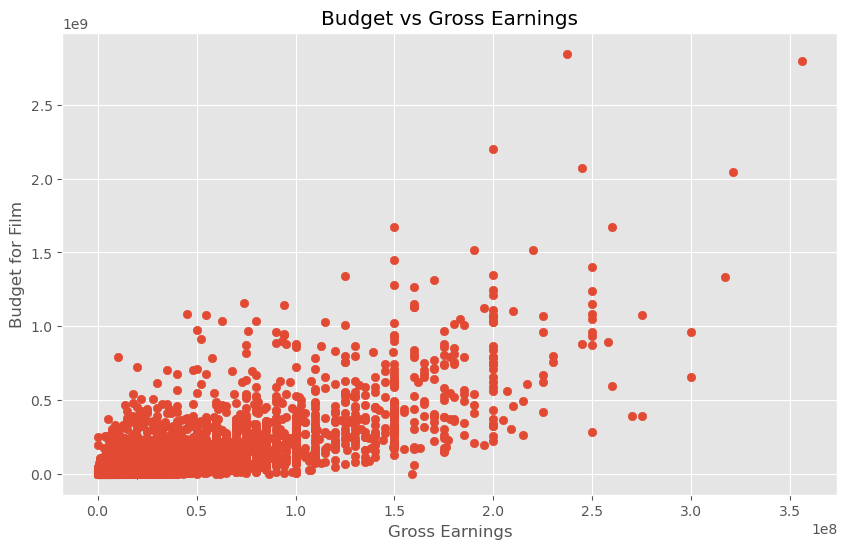

In [40]:
# Scatter Plot: Budget vs Gross Earnings

# Plotting a scatter plot to explore the relationship between a film's budget and its gross revenue.
# Each point represents a movie, with:
# X-axis = Budget
# Y-axis = Gross earnings (Revenue)

plt.figure(figsize=(10, 6))
plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

# The scatter plot shows a positive trend: as the budget increases, the gross revenue tends to increase as well.
# This suggests that films with higher budgets generally earn more money, though the relationship isn't perfectly linear.

<Axes: xlabel='budget', ylabel='gross'>

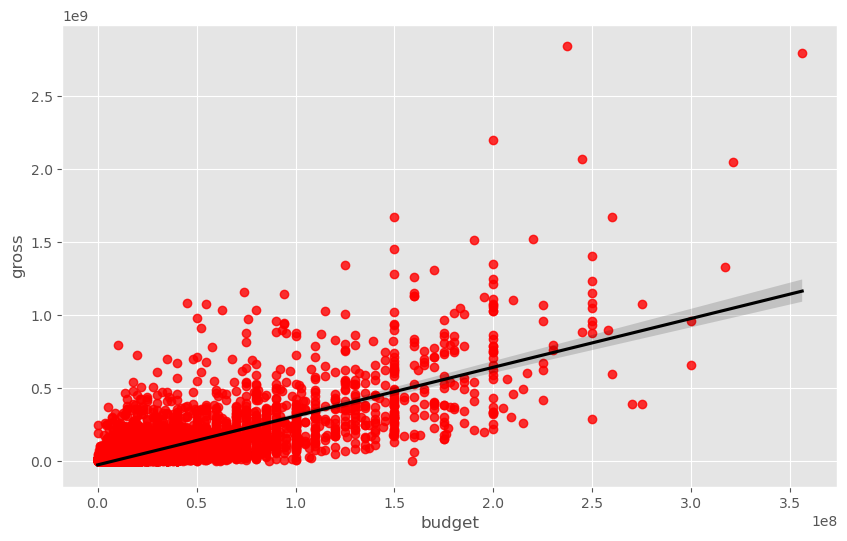

In [42]:
# Plot budget vs gross using seaborn

plt.figure(figsize=(10, 6))
sns.regplot(x = 'budget', y= 'gross', data = df, scatter_kws={"color":"red"}, line_kws={"color":"black"})

# The regression line shows a clear positive relationship: higher budgets tend to result in higher gross earnings. 
# The gray band represents uncertainty and widens for extreme budget values.

In [44]:
# Let's start looking at correlations

df.corr(method='pearson')  # pearson(by default), kendall, spearman

C:\Users\neslihan\AppData\Local\Temp\ipykernel_13740\1163927724.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')  # pearson(by default), kandall, spearman


year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.285308  0.259504  0.120811
score    0.097995  1.000000  0.409182  0.058556  0.185583  0.399451
votes    0.222945  0.409182  1.000000  0.458058  0.632103  0.309212
budget   0.285308  0.058556  0.458058  1.000000  0.740152  0.269772
gross    0.259504  0.185583  0.632103  0.740152  1.000000  0.244360
runtime  0.120811  0.399451  0.309212  0.269772  0.244360  1.000000

In [45]:
df.corr(method='kendall')

C:\Users\neslihan\AppData\Local\Temp\ipykernel_13740\1723791258.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='kendall')


year     score     votes    budget     gross   runtime
year     1.000000  0.067652  0.331465  0.179754  0.196205  0.097184
score    0.067652  1.000000  0.300115 -0.005809  0.084542  0.283611
votes    0.331465  0.300115  1.000000  0.285049  0.530016  0.198240
budget   0.179754 -0.005809  0.285049  1.000000  0.406213  0.188892
gross    0.196205  0.084542  0.530016  0.406213  1.000000  0.165127
runtime  0.097184  0.283611  0.198240  0.188892  0.165127  1.000000

In [47]:
df.corr(method='spearman') # we will stick by default (pearson)

C:\Users\neslihan\AppData\Local\Temp\ipykernel_13740\1222267885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='spearman')


year     score     votes    budget     gross   runtime
year     1.000000  0.099045  0.469829  0.254626  0.287788  0.142977
score    0.099045  1.000000  0.428138 -0.008810  0.124016  0.399857
votes    0.469829  0.428138  1.000000  0.407644  0.722491  0.290159
budget   0.254626 -0.008810  0.407644  1.000000  0.563730  0.269967
gross    0.287788  0.124016  0.722491  0.563730  1.000000  0.241439
runtime  0.142977  0.399857  0.290159  0.269967  0.241439  1.000000

C:\Users\neslihan\AppData\Local\Temp\ipykernel_13740\1334496274.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


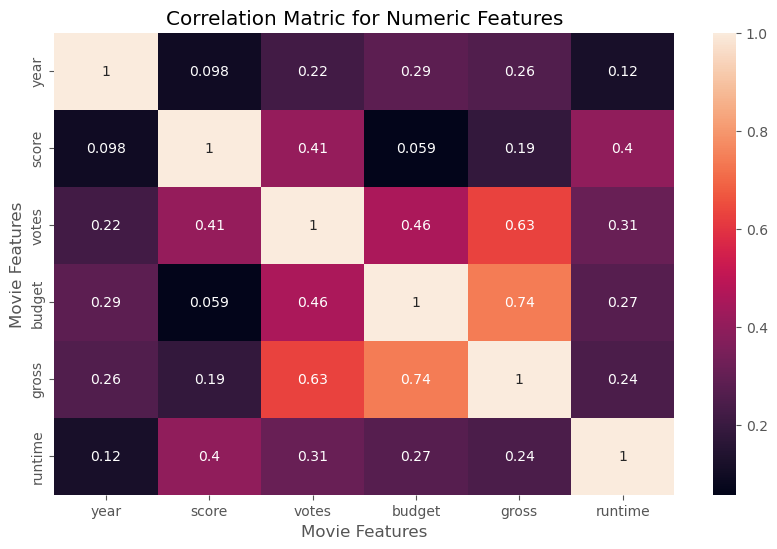

In [52]:
# High correlation between budget and gross

correlation_matrix = df.corr(method='pearson')

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [60]:
# Convert all object (string/categorical) columns in the DataFrame to numeric codes
# This is useful for correlation analysis that require numerical input

df_numerized = df.copy()   # Make a copy of the original DataFrame to preserve the raw data

# Loop through each column in the DataFrame
for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':     # If the column's data type is object (usually strings or mixed types)
        df_numerized[col_name] = df_numerized[col_name].astype('category')    # Convert the column to a categorical type
        df_numerized[col_name] = df_numerized[col_name].cat.codes       # Replace the column with its numeric category codes
df_numerized.head()

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       5      0  2009       696    7.8  1100000.0      1155    1778   
7445   535       5      0  2019       183    8.4   903000.0       162     743   
3045  6896       5      6  1997       704    7.8  1100000.0      1155    1778   
6663  5144       5      0  2015       698    7.8   876000.0      1125    2550   
7244   536       5      0  2018       192    8.4   897000.0       162     743   

      star  country     budget       gross  company  runtime  yearcorrected  
5445  2334       55  237000000  2847246203     2253    162.0             29  
7445  2241       55  356000000  2797501328     1606    181.0             39  
3045  1595       55  200000000  2201647264     2253    194.0             17  
6663   524       55  245000000  2069521700     1540    138.0             35  
7244  2241       55  321000000  2048359754     1606    149.0             38

In [61]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime yearcorrected  
5445  2847246203  Twentieth Century Fox    162.0          2009  
7445  2797501328         Marvel Studios    181.0          2019  
3045  2201647264  Twentieth Century Fox    194.0          1997  
6663  2069521700              Lucasfilm    138.0          2015  
7244  2048359754         Marvel Studios    149.0          2018

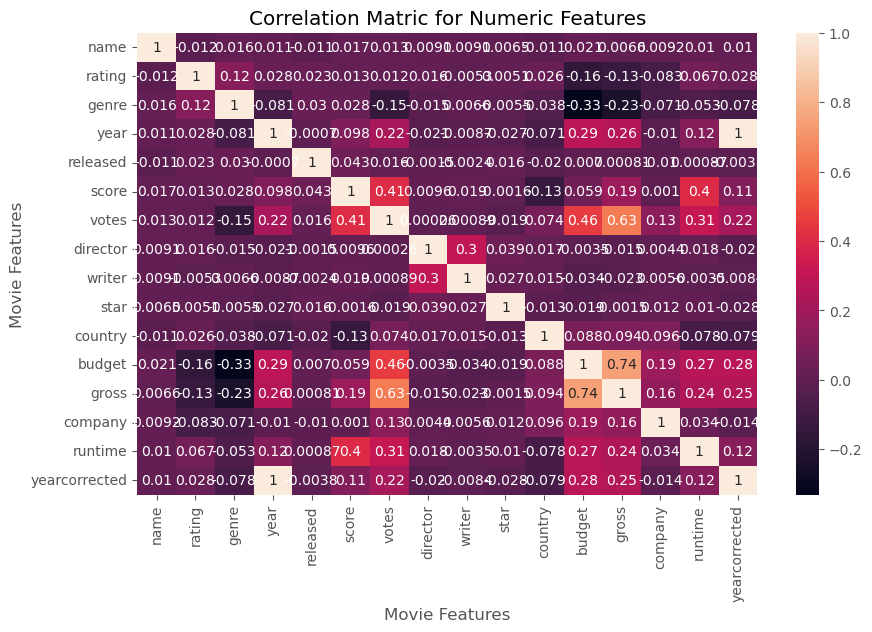

In [55]:
correlation_matrix = df_numerized.corr(method='pearson')

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [56]:
# Calculate the correlation matrix for all numeric columns in the numerized DataFrame
correlation_mat = df_numerized.corr()

# Unstack the correlation matrix into a Series to view all pairs of correlated features
# This transforms the matrix into a long-form format: (column1, column2) => correlation value
corr_pairs = correlation_mat.unstack()

corr_pairs

name           name             1.000000
               rating          -0.012441
               genre            0.016355
               year             0.011453
               released        -0.011311
               score            0.017097
               votes            0.013088
               director         0.009079
               writer           0.009081
               star             0.006472
               country         -0.010737
               budget           0.020980
               gross            0.006601
               company          0.009211
               runtime          0.010392
               yearcorrected    0.010225
rating         name            -0.012441
               rating           1.000000
               genre            0.123465
               year             0.027931
               released         0.023466
               score            0.013247
               votes            0.012379
               director         0.016255
               w

In [58]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre          budget          -0.330661
budget         genre           -0.330661
genre          gross           -0.233385
gross          genre           -0.233385
rating         budget          -0.157505
budget         rating          -0.157505
votes          genre           -0.145307
genre          votes           -0.145307
country        score           -0.133348
score          country         -0.133348
gross          rating          -0.130478
rating         gross           -0.130478
               company         -0.083227
company        rating          -0.083227
year           genre           -0.081261
genre          year            -0.081261
yearcorrected  country         -0.079009
country        yearcorrected   -0.079009
runtime        country         -0.078412
country        runtime         -0.078412
yearcorrected  genre           -0.078210
genre          yearcorrected   -0.078210
company        genre           -0.071067
genre          company         -0.071067
country        y

In [59]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes          gross            0.632103
gross          votes            0.632103
budget         gross            0.740152
gross          budget           0.740152
yearcorrected  year             0.996397
year           yearcorrected    0.996397
name           name             1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
star           star             1.000000
writer         writer           1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
released       released         1.000000
year           year             1.000000
genre          genre            1.000000
rating         rating           1.000000
runtime        runtime          1.000000
yearcorrected  yearcorrected    1.000000
dtype: float64